<a href="https://colab.research.google.com/github/iambibro/NCPOR/blob/main/3_Ncpor_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df1= pd.read_csv('/content/final_complete_hourly_data_2016_2019.csv') 

FileNotFoundError: ignored

In [ ]:
df1.head()

,date,tempr,ap,ws,rh,blizzard
0,2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0
1,2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0
2,2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0
3,2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0
4,2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0


In [ ]:
df1= pd.read_csv('/content/final_complete_hourly_data_2016_2019.csv',parse_dates=['date'],index_col='date')

In [ ]:
df1.head()

,tempr,ap,ws,rh,blizzard
date,,,,,
2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0
2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0
2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0
2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0
2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0


In [ ]:
df1.tail()

,tempr,ap,ws,rh,blizzard
date,,,,,
2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0
2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0
2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0
2021-02-04 22:00:00,-4.98,976.44,7.22,50.56,0
2021-02-04 23:00:00,-4.93,976.67,7.07,51.44,0


In [ ]:
df1.describe

<bound method NDFrame.describe of                      tempr      ap     ws     rh  blizzard
date                                                      
2016-01-01 00:00:00   1.16  980.83   8.27  67.60         0
2016-01-01 01:00:00   1.35  980.95  10.91  65.30         0
2016-01-01 02:00:00   1.53  981.07   8.59  64.70         0
2016-01-01 03:00:00   1.43  981.37   8.18  66.10         0
2016-01-01 04:00:00   1.24  981.66   9.19  73.86         0
...                    ...     ...    ...    ...       ...
2021-02-04 19:00:00  -4.58  975.76   3.17  60.35         0
2021-02-04 20:00:00  -3.88  975.98   5.95  51.05         0
2021-02-04 21:00:00  -4.50  976.21   7.17  49.89         0
2021-02-04 22:00:00  -4.98  976.44   7.22  50.56         0
2021-02-04 23:00:00  -4.93  976.67   7.07  51.44         0

[44688 rows x 5 columns]>

In [ ]:
#Testing For stationary
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df1['tempr'])

In [ ]:
def adfuller_test(tempr):
  result= adfuller(tempr)
  lables=['ADF Test Statistics', 'P_value', '#lags used','Number of Observation used']
  for value,label in zip(result,lables):
    print(label+': '+str(value))
  if result[1]<=0.05:
    print('strong evidance against the null hypothisis')
  else:
    print('week evidance against null hypothisis')

In [ ]:
adfuller_test(df1['tempr'])

ADF Test Statistics: -9.632041669790723
P_value: 1.602588797856662e-16
#lags used: 56
Number of Observation used: 44631
strong evidance against the null hypothisis


**Differencing:**

In [ ]:
df1['tempr first difference']= df1['tempr']-df1['tempr'].shift(1)

In [ ]:
df1['tempr']

date
2016-01-01 00:00:00    1.16
2016-01-01 01:00:00    1.35
2016-01-01 02:00:00    1.53
2016-01-01 03:00:00    1.43
2016-01-01 04:00:00    1.24
                       ... 
2021-02-04 19:00:00   -4.58
2021-02-04 20:00:00   -3.88
2021-02-04 21:00:00   -4.50
2021-02-04 22:00:00   -4.98
2021-02-04 23:00:00   -4.93
Name: tempr, Length: 44688, dtype: float64

In [ ]:
df1['tempr'].shift(1)

date
2016-01-01 00:00:00     NaN
2016-01-01 01:00:00    1.16
2016-01-01 02:00:00    1.35
2016-01-01 03:00:00    1.53
2016-01-01 04:00:00    1.43
                       ... 
2021-02-04 19:00:00   -4.33
2021-02-04 20:00:00   -4.58
2021-02-04 21:00:00   -3.88
2021-02-04 22:00:00   -4.50
2021-02-04 23:00:00   -4.98
Name: tempr, Length: 44688, dtype: float64

In [ ]:
#seasonal difference
df1['Seasonal First Diffrence']= df1['tempr']-df1['tempr'].shift(12)

In [ ]:
df1.head(14)

,tempr,ap,ws,rh,blizzard,tempr first difference,Seasonal First Diffrence
date,,,,,,,
2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0,NaN,NaN
2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0,0.19,NaN
2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0,0.18,NaN
2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0,-0.10,NaN
2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0,-0.19,NaN
2016-01-01 05:00:00,1.57,981.96,10.45,68.28,0,0.33,NaN
2016-01-01 06:00:00,1.48,982.45,8.72,69.09,0,-0.09,NaN
2016-01-01 07:00:00,1.51,982.82,9.14,69.54,0,0.03,NaN
2016-01-01 08:00:00,1.55,983.05,8.44,68.19,0,0.04,NaN


In [ ]:
#Again test dicky fuller test
adfuller_test(df1['Seasonal First Diffrence'].dropna())

ADF Test Statistics: -34.795032210778906
P_value: 0.0
#lags used: 56
Number of Observation used: 44619
strong evidance against the null hypothisis


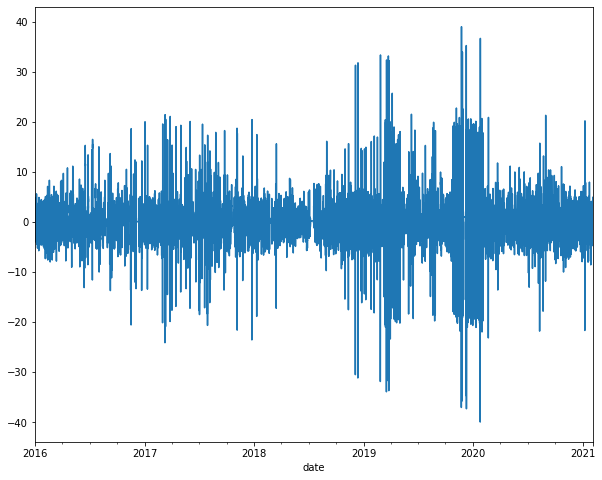

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']= 10,8
df1['Seasonal First Diffrence'].plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

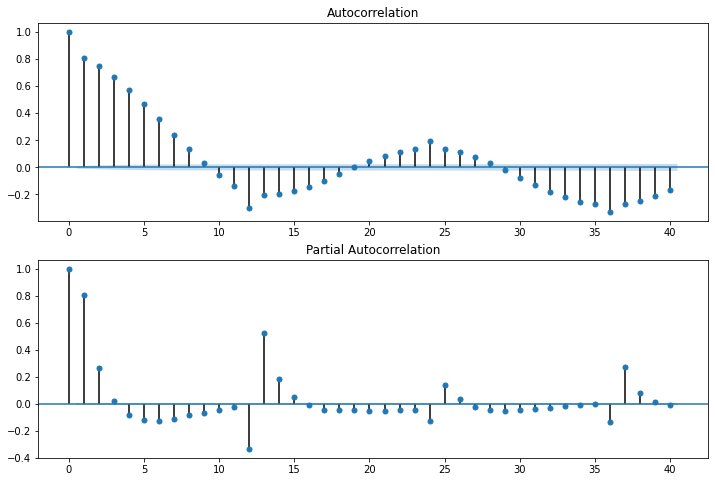

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Seasonal First Diffrence'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Seasonal First Diffrence'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1 (AR specification), d=1 (Integration order), q=0 or 1 (MA specification/polynomial) AR specification, Integration order, MA specification
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df1['tempr'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.tempr   No. Observations:                44687
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -78907.479
Method:                       css-mle   S.D. of innovations              1.415
Date:                Wed, 01 Dec 2021   AIC                         157822.958
Time:                        11:16:48   BIC                         157857.788
Sample:                    01-01-2016   HQIC                        157833.925
                         - 02-04-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.004     -0.031      0.975      -0.009       0.008
ar.L1.D.tempr    -0.1372      0.011    -12.453      0.000      -0.159      -0.116
ma.L1.D.tempr    -0.2571      0.011    -24.431      0.000      -0.278      -0.236
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.2879           +0.0000j            7.2879            0.5000
MA.1            3.8899           +0.0000j            3.8899            0.0000
-----------------------------------------------------------------------------
"""

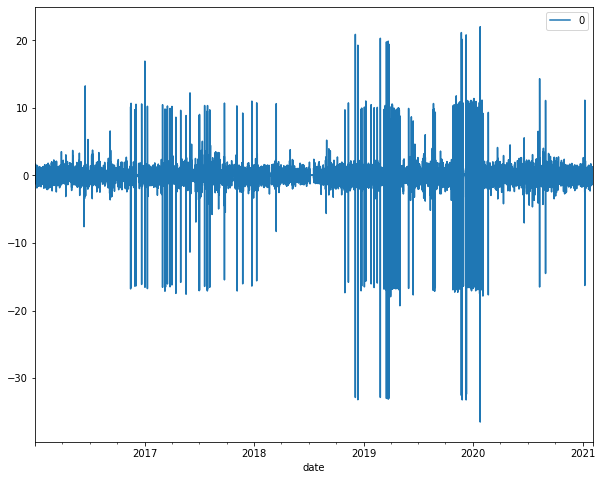

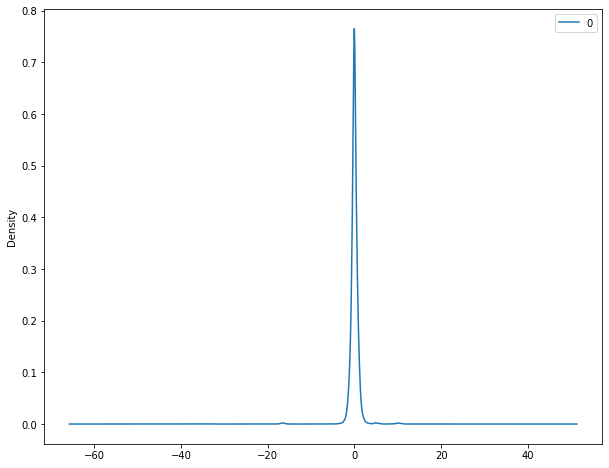

                  0
count  44687.000000
mean       0.000002
std        1.414608
min      -36.502871
25%       -0.349712
50%       -0.003017
75%        0.378926
max       22.029498


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

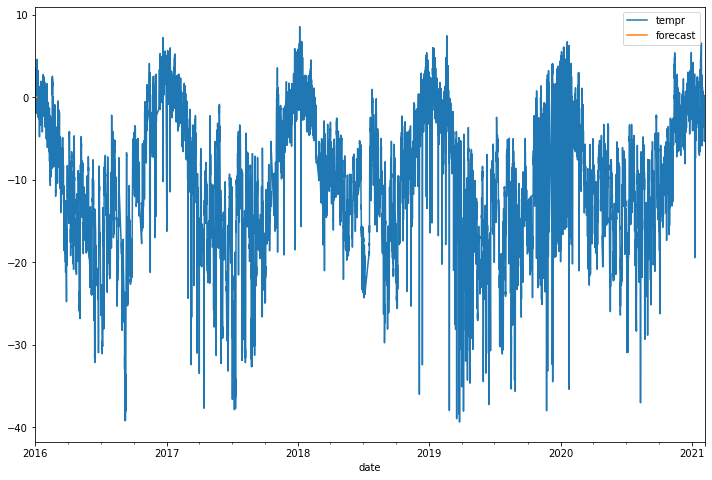

In [ ]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['tempr','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1['tempr'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              tempr   No. Observations:                44688
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -76541.334
Date:                            Wed, 01 Dec 2021   AIC                         153092.669
Time:                                    11:22:10   BIC                         153136.205
Sample:                                01-01-2016   HQIC                        153106.378
                                     - 02-04-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1403      0.004    -34.297      0.000      -0.148      -0.132
ma.L1         -0.2393      0.004    -56.062      0.000      -0.248      -0.231
ar.S.L12      -0.1750      0.002    -82.303      0.000      -0.179      -0.171
ma.S.L12      -0.9524      0.000  -2253.297      0.000      -0.953      -0.952
sigma2         1.8003      0.002   1043.205      0.000       1.797       1.804
===================================================================================
Ljung-Box (Q):                     2469.68   Jarque-Bera (JB):          26466561.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                            -4.23
Prob(H) (two-sided):                  0.00   Kurtosis:                       121.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

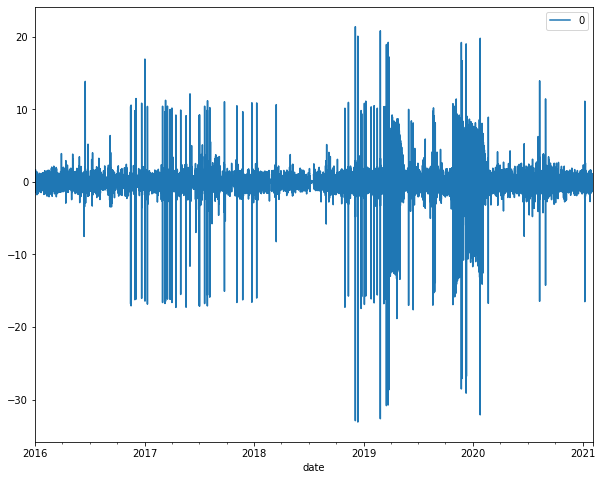

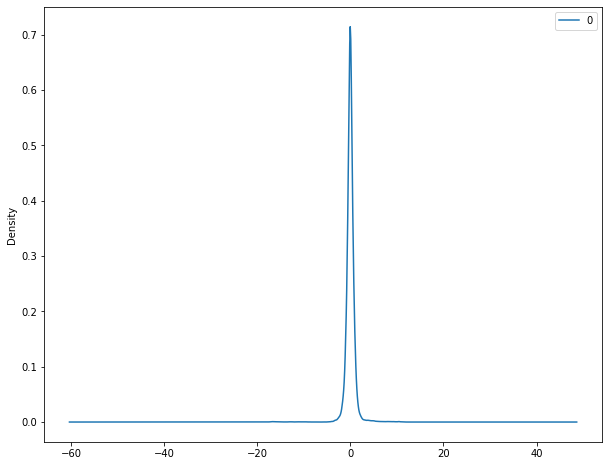

                  0
count  44688.000000
mean      -0.000102
std        1.341717
min      -33.085266
25%       -0.384798
50%       -0.004203
75%        0.379725
max       21.380439


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(results.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

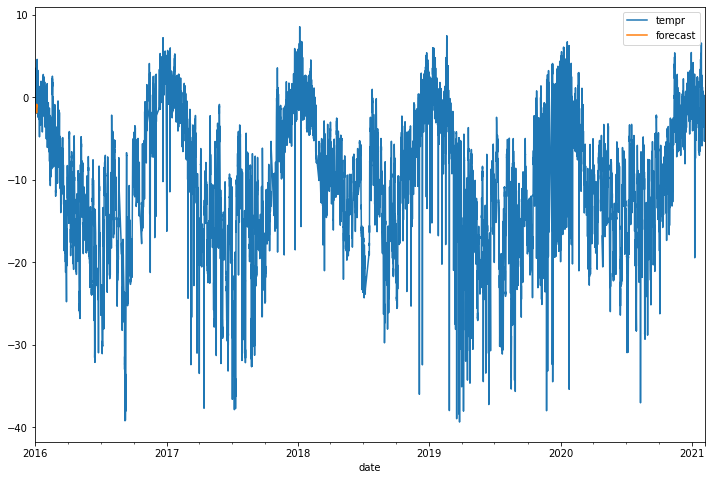

In [ ]:
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['tempr','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [ ]:
future_datest_df1= pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [ ]:
future_datest_df1.tail()

,tempr,ap,ws,rh,blizzard,tempr first difference,Seasonal First Diffrence,forecast
2025-09-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df1=pd.concat([df1,future_datest_df1])

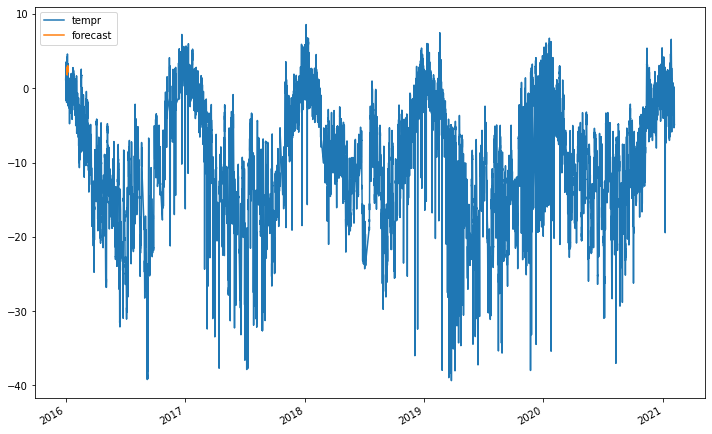

In [ ]:
future_df1['forecast'] = results.predict(start = 104, end = 156, dynamic= True)  
future_df1[['tempr', 'forecast']].plot(figsize=(12, 8)) 

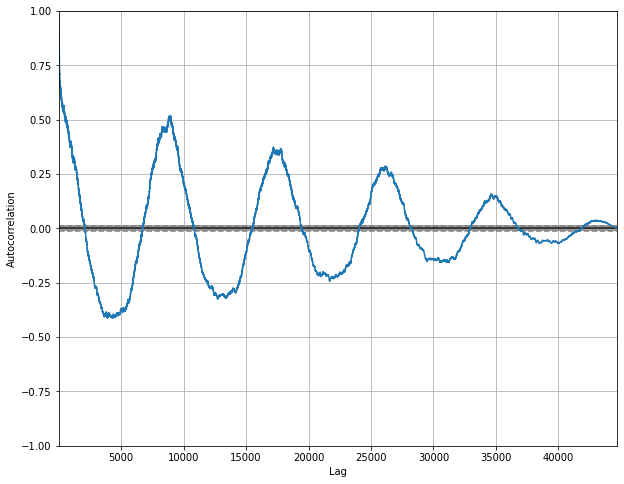

In [ ]:
#Auto Regressiveve Model
#Auto correlation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['tempr'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

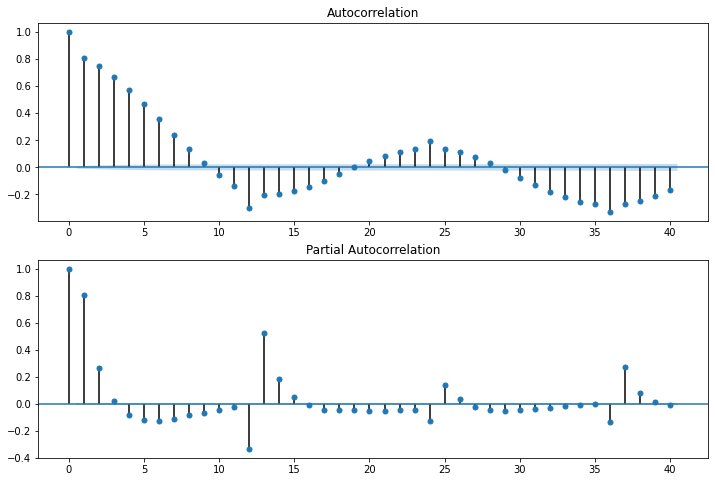

In [ ]:
fig= plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df1['Seasonal First Diffrence'].iloc[13:], lags=40, ax=ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df1['Seasonal First Diffrence'].iloc[13:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df1['tempr'],order=(1,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
model_fit= model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.tempr   No. Observations:                44687
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -78907.479
Method:                       css-mle   S.D. of innovations              1.415
Date:                Wed, 01 Dec 2021   AIC                         157822.958
Time:                        11:32:24   BIC                         157857.788
Sample:                    01-01-2016   HQIC                        157833.925
                         - 02-04-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.004     -0.031      0.975      -0.009       0.008
ar.L1.D.tempr    -0.1372      0.011    -12.453      0.000      -0.159      -0.116
ma.L1.D.tempr    -0.2571      0.011    -24.431      0.000      -0.278      -0.236
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.2879           +0.0000j            7.2879            0.5000
MA.1            3.8899           +0.0000j            3.8899            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
import statsmodels.api as sm

In [ ]:
model= sm.tsa.statespace.SARIMAX(df1['tempr'],order= (1,1,1),seaonal_order=(1,1,1,12))
result= model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


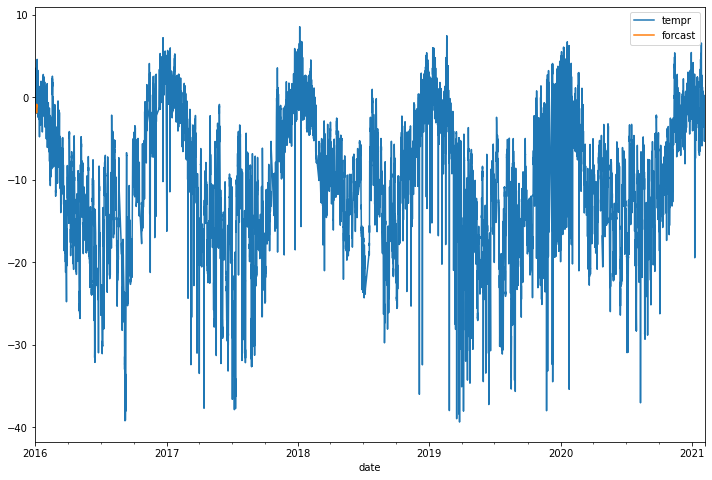

In [ ]:
df1['forcast']= results.predict(start=90,end=103,dynamic=True)
df1[['tempr', 'forcast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [ ]:
future_datest_df1= pd.DataFrame(index= future_dates[1:],columns=df1.columns)

In [ ]:
future_datest_df1.tail()

,tempr,ap,ws,rh,blizzard,tempr first difference,Seasonal First Diffrence,forecast,forcast
2022-09-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df1= pd.concat([df1, future_datest_df1])

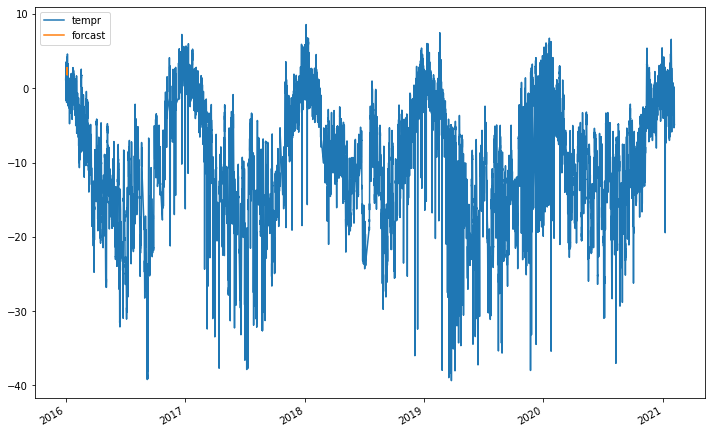

In [ ]:
future_df1['forcast']= results.predict(start= 104,end=120,dynamic=True)
future_df1[['tempr','forcast']].plot(figsize=(12,8))